### Overview
The notebook works with dataset, containing information about Students Performance in exam.

### Goals
* Identification of clusters of excellent, good and poor performing students, using K-Means algorithm
* Comparision of exam results of the students from each cluster
* Visualization of excellent performance cluster characteristics

In [1]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


students_data = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
students_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### K-Means algorithm
Identifying clusters

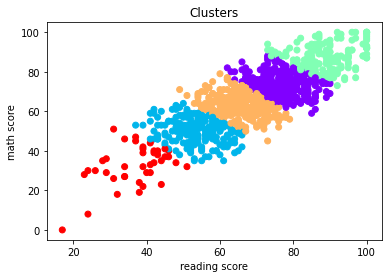

In [2]:
#Number of clusters set for 5
kmeans = KMeans(5)

#Clustering based on reading and math scores
kmeans.fit(students_data.loc[:,["reading score", "math score"]])
identified_clusters = kmeans.fit_predict(students_data.loc[:,["reading score", "math score"]])

#Adding a column to the dataset with cluster fit 
data_with_clusters = students_data.copy()
data_with_clusters["Cluster"] = identified_clusters

plt.scatter(data_with_clusters["reading score"], data_with_clusters["math score"], 
            c = data_with_clusters["Cluster"], cmap = "rainbow")
plt.title("Clusters")
plt.xlabel("reading score")
plt.ylabel("math score")
plt.show()

#### Evaluation with elbow method
Trying to find a "sweet spot" between number of clusters and the sum of squared error

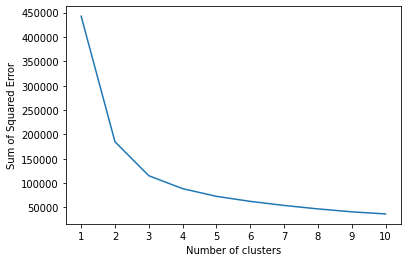

In [3]:
#Trying out different numbers as the number of clusters 
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(students_data.loc[:,["reading score", "math score"]])
    #Computing the sum of squared error for each
    sse.append(kmeans.inertia_)


plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squared Error")
plt.show()

"The sweet spot" from the elbow method is the point, where curve starts to bend. The best value seems to be "3", thus below K-Means algorithm is used again to identify clusters, but this time only three.

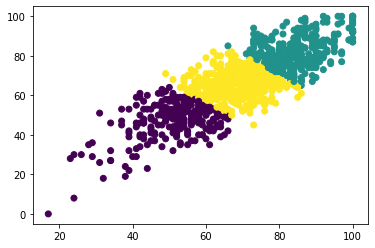

In [4]:
#Algorithm, fitting + adding info about clusters to data set
kmeans = KMeans(3)
kmeans.fit(students_data.loc[:,["reading score", "math score"]])
identified_clusters = kmeans.fit_predict(students_data.loc[:,["reading score", "math score"]])
students_data["Cluster"] = identified_clusters

#Visualization
plt.scatter(students_data["reading score"], students_data["math score"], c = students_data["Cluster"])
plt.show()

#### Comparision of performance of students from different clusters in the exams

In [10]:
good_performance = data_with_clusters[data_with_clusters["Cluster"] == 0]
poor_performance = data_with_clusters[data_with_clusters["Cluster"] == 1]
excellent_performance = data_with_clusters[data_with_clusters["Cluster"] == 2]

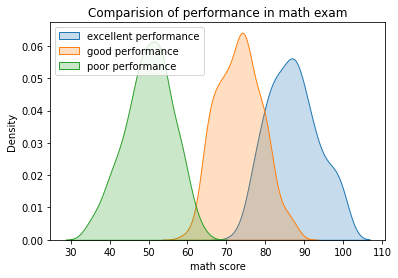

In [11]:
sns.kdeplot(data=excellent_performance['math score'], label="excellent performance", shade=True)
sns.kdeplot(data=good_performance['math score'], label="good performance", shade=True)
sns.kdeplot(data=poor_performance['math score'], label="poor performance", shade=True)
plt.title("Comparision of performance in math exam")
plt.legend(loc = "upper left")

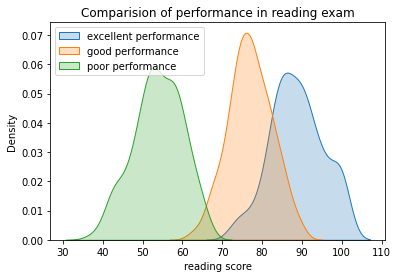

In [13]:
sns.kdeplot(data=excellent_performance['reading score'], label="excellent performance", shade=True)
sns.kdeplot(data=good_performance['reading score'], label="good performance", shade=True)
sns.kdeplot(data=poor_performance['reading score'], label="poor performance", shade=True)
plt.title("Comparision of performance in reading exam")
plt.legend(loc = "upper left")

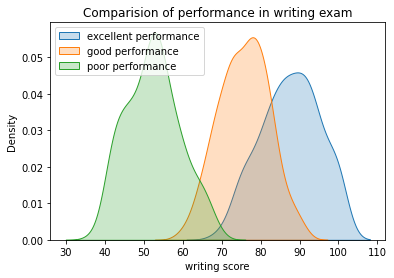

In [14]:
sns.kdeplot(data=excellent_performance['writing score'], label="excellent performance", shade=True)
sns.kdeplot(data=good_performance['writing score'], label="good performance", shade=True)
sns.kdeplot(data=poor_performance['writing score'], label="poor performance", shade=True)
plt.title("Comparision of performance in writing exam")
plt.legend(loc = "upper left")

#### Cluster characteristics - Students with **excellent performance**
Simple analysis and visualizations to characterize students from excellent_performance cluster

Text(0.5, 1.0, 'Gender ratio')

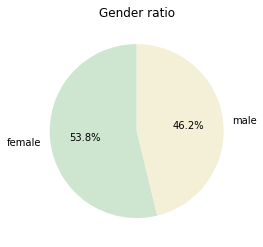

In [15]:
#gender analysis
gender_share = [len(excellent_performance[excellent_performance["gender"] == "female"]), len(excellent_performance[excellent_performance["gender"] == "male"])]

plt.pie(gender_share, labels = ["female", "male"], colors = ["#CEE5D0", "#F3F0D7"], autopct = '%1.1f%%', startangle = 90)
plt.title("Gender ratio")


Text(0.5, 1.0, 'Ethnicity')

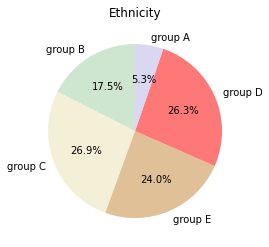

In [16]:
#ethnicity
ethnicity = excellent_performance["race/ethnicity"].unique()
ethnicity_share = [len(excellent_performance[excellent_performance["race/ethnicity"] == group]) for group in ethnicity]

plt.pie(ethnicity_share, labels = ethnicity, colors = ["#CEE5D0", "#F3F0D7", "#E0C097", "#FF7878", "#D9D7F1"], autopct = '%1.1f%%', startangle = 90)
plt.title("Ethnicity")

Text(0.5, 1.0, 'Parental level of education')

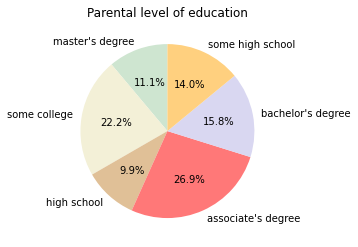

In [17]:
parents = excellent_performance["parental level of education"].unique()
parents_share = [len(excellent_performance[excellent_performance["parental level of education"] == group]) for group in parents]

plt.pie(parents_share, labels = parents, colors = ["#CEE5D0", "#F3F0D7", "#E0C097", "#FF7878", "#D9D7F1", "#FFD07F"], autopct = '%1.1f%%', startangle = 90)
plt.title("Parental level of education")

Text(0.5, 1.0, 'Lunch')

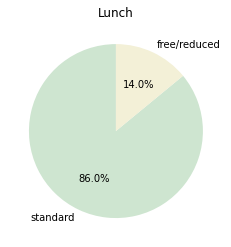

In [18]:
lunch = excellent_performance["lunch"].unique()
lunch_share = [len(excellent_performance[excellent_performance["lunch"] == group]) for group in lunch]

plt.pie(lunch_share, labels = lunch, colors = ["#CEE5D0", "#F3F0D7"], autopct = '%1.1f%%', startangle = 90)
plt.title("Lunch")

Text(0.5, 1.0, 'Test prepatation course')

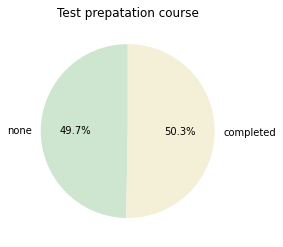

In [19]:
preparation = excellent_performance["test preparation course"].unique()
preparation_share = [len(excellent_performance[excellent_performance["test preparation course"] == group]) for group in preparation]

plt.pie(preparation_share, labels = preparation, colors = ["#CEE5D0", "#F3F0D7"], autopct = '%1.1f%%', startangle = 90)
plt.title("Test prepatation course")

In [20]:
poor_performance.describe()

,math score,reading score,writing score,Cluster
count,206.000000,206.000000,206.000000,206.0
mean,50.024272,53.805825,52.291262,1.0
std,6.114708,6.155003,6.868992,0.0
min,35.000000,37.000000,37.000000,1.0
25%,46.000000,50.000000,47.000000,1.0
50%,50.000000,54.000000,52.000000,1.0
75%,54.000000,58.000000,57.000000,1.0
max,64.000000,66.000000,69.000000,1.0


### Conclusions
* Optimal number of clusters in case of math and reading score classification was three.
* Students were classified into groups of excellent, good and poor performance
* KDE plots show difference between student performance from those clusters.
    * excellent performace is usually around 85%, good 65%, poor 35%

##### Characteristics of students with excellent performance
Students with excellent performance are usually female and had standard lunch. Students from this cluster are divided "half/half", when it comes to preparation course. Parents of 26,6% students have associate's degree and the biggest shares of ethnicity among the students have group C, D and E. 

